# Import Data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
import tensorflow as tf
import keras
from keras import layers
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Breast Cancer Classification/Chi-PCA-Rfe/'
data = pd.read_csv(file_path + 'rearranged_data_rfe_rf.csv')
data.columns

Index(['PCA 1', 'PCA 3', 'PCA 4', 'PCA 2', 'PCA 8', 'PCA 10', 'PCA 11',
       'PCA 12', 'PCA 6', 'PCA 21', 'PCA 5', 'PCA 14', 'PCA 7', 'PCA 13',
       'PCA 17', 'PCA 9', 'PCA 23', 'PCA 29', 'PCA 26', 'PCA 16', 'PCA 19',
       'PCA 24', 'PCA 15', 'PCA 25', 'PCA 18', 'PCA 30', 'PCA 22', 'PCA 28',
       'PCA 27', 'PCA 20', 'Class'],
      dtype='object')

In [5]:
data.shape[1]

31

# Select No. of Features

In [6]:
feat_dnn = 17

# DNN

In [7]:
# Load the dataset
#data = pd.read_csv('rearranged_data_rfe_rf.csv')

X = data.iloc[:, :feat_dnn].values # Features
y = data.iloc[:, -1].values # Labels

# Map 'B' to 0 and 'M' to 1
y_encoded = y.copy()
y_encoded = [0 if label == 'B' else 1 for label in y]

# Check the transformation
#print(y_encoded)
y = y_encoded

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=143017)

In [8]:
# Scaling the dataset
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [9]:
# Build the DNN model
model = keras.Sequential(
    [
        layers.Dense(40, activation='relu', input_dim=X_train.shape[1]),
        layers.Dense(20, activation='relu'),
        layers.Dense(1, activation='sigmoid') # Binary classification
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 40)                  │             720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,561 (6.10 KB)

 Trainable params: 1,561 (6.10 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [12]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.keras',
                                              monitor='val_accuracy', mode='max',
                                              verbose=1)

In [13]:
X_train = np.array(X_train)
y_train = np.array(y_train)
history = model.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 10,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
26/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4424 - loss: 0.7181
Epoch 1: saving model to best_model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4880 - loss: 0.6993 - val_accuracy: 0.6374 - val_loss: 0.5920
Epoch 2/20
33/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7037 - loss: 0.5310
Epoch 2: saving model to best_model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7044 - loss: 0.5298 - val_accuracy: 0.6703 - val_loss: 0.5326
Epoch 3/20
20/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6908 - loss: 0.5145 
Epoch 3: saving model to best_model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7511 - loss: 0.4800 - val_accuracy: 0.7582 - val_loss: 0.4328
Epoch 4/20
23/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8766 - loss: 0.3487 
Epoch 4: saving model to best_model.keras
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8872 - loss: 0.3368 - val_accuracy: 0.9011 - val_loss: 0.3206
Epoch 5/20
22/37 ━━━━━━━━━━━━━━━━

Accuracy

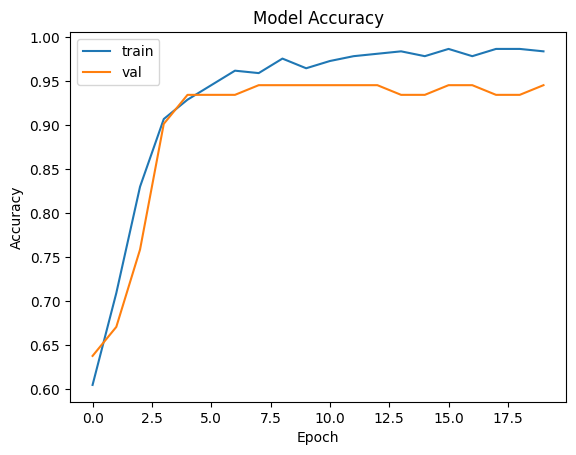

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Loss

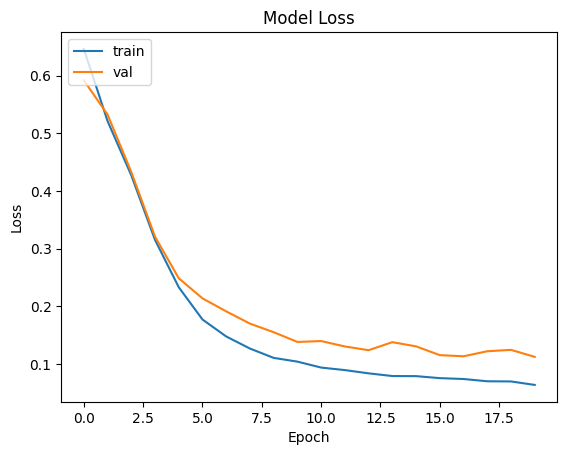

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Combined Accurac & Loss

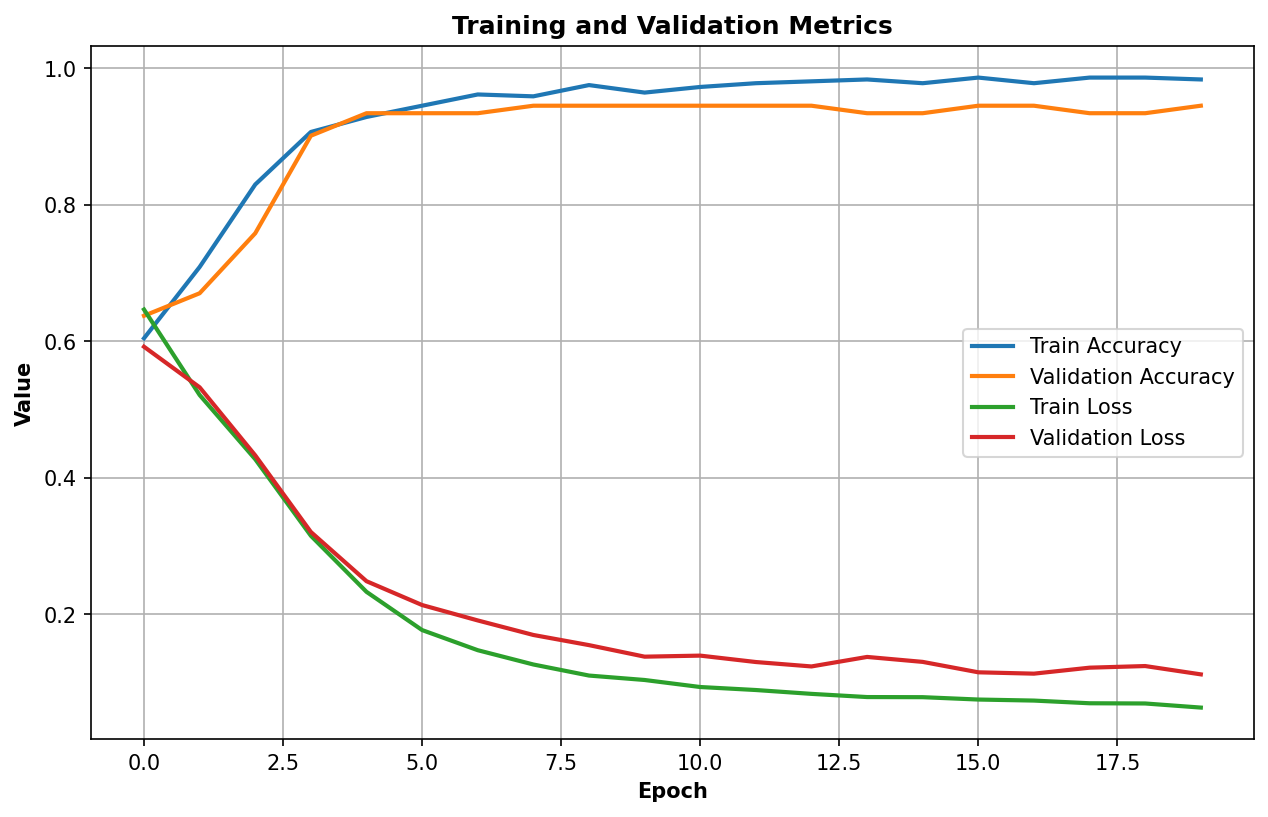

In [16]:
# Plot the training and validation accuracy and loss over epochs
plt.figure(figsize=(10, 6), dpi=150)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)

# Plot loss
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)

plt.xlabel('Epoch', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.title('Training and Validation Metrics', fontweight='bold')
plt.legend()
plt.grid(True)

# Save the figure
#plt.savefig('accuracy_loss_curve.png', dpi=300)
plt.show()

In [17]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [18]:
# Printing confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)
n_classes = cm.shape[0]
class_accuracy = []
for i in range(n_classes):
    class_accuracy.append(cm[i,i]/np.sum(cm[i,:]))
print("Accuracy of each class: ", class_accuracy)

Confusion matrix:
 [[63  2]
 [ 2 47]]
Accuracy of each class:  [0.9692307692307692, 0.9591836734693877]


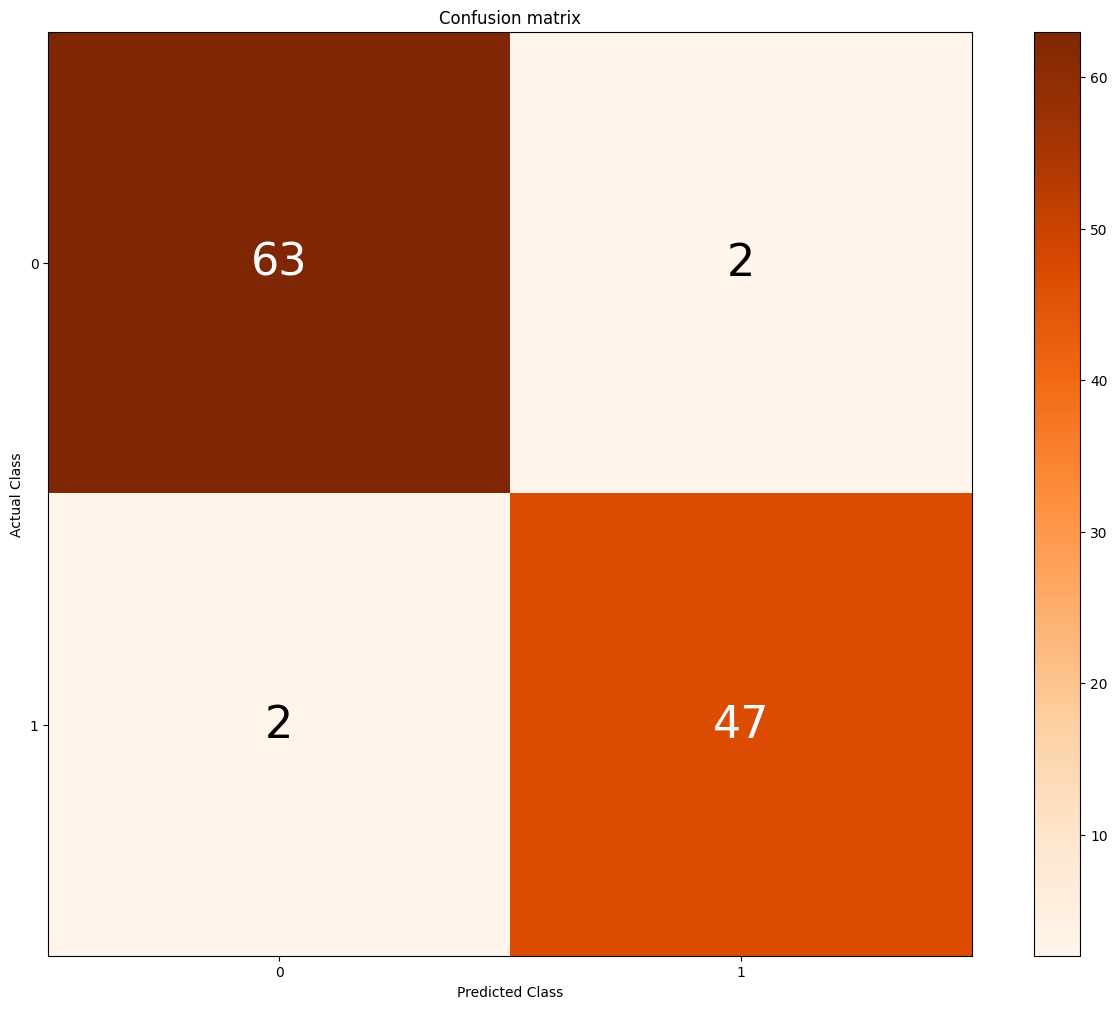

In [19]:
# Plotting confusion matrix
plt.figure(figsize=(16, 12))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, sorted(set(y)))
plt.yticks(tick_marks, sorted(set(y)))
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.annotate(str(cm[i][j]), xy=(j, i),
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='white' if cm[i][j] > (0.5*cm.max()) else 'black',
                     fontsize=32)
plt.rcParams.update({'font.size': 24})
plt.savefig('cm-svm.png')
plt.show()

In [20]:
# Printing classification report
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       0.96      0.96      0.96        49

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [21]:
# Calculating metrics
accuracy_svm = metrics.accuracy_score(y_test, y_pred)
precision_svm = metrics.precision_score(y_test, y_pred, average=None)
recall_svm = metrics.recall_score(y_test, y_pred, average=None)
f1_score_svm = metrics.f1_score(y_test, y_pred, average=None)

In [22]:
# Printing metrics rounded to two decimal points
print("Accuracy:", round(accuracy_svm, 4))
print("Precision:", [round(p, 4) for p in precision_svm], round(sum(precision_svm) / len(precision_svm), 4))
print("Recall:", [round(r, 4) for r in recall_svm], round(sum(recall_svm) / len(recall_svm), 4))
print("F1-Score:", [round(f, 4) for f in f1_score_svm], round(sum(f1_score_svm) / len(f1_score_svm), 4))

Accuracy: 0.9649
Precision: [0.9692, 0.9592] 0.9642
Recall: [0.9692, 0.9592] 0.9642
F1-Score: [0.9692, 0.9592] 0.9642
